# Task 3- To Explore Unsupervised Machine Learning



# Problem:

   From the given"Iris" dataset predict the optimum number of clusters and represent it visually.

In [7]:
import pandas as pd # for read the data
import numpy as np   # for perform the calculation
import seaborn as sns  # for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets  ## for loading the iris data set

In [9]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [10]:
df.shape

(150, 4)

In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [13]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# Here i am plotting the graph of data point for understanding their distribution

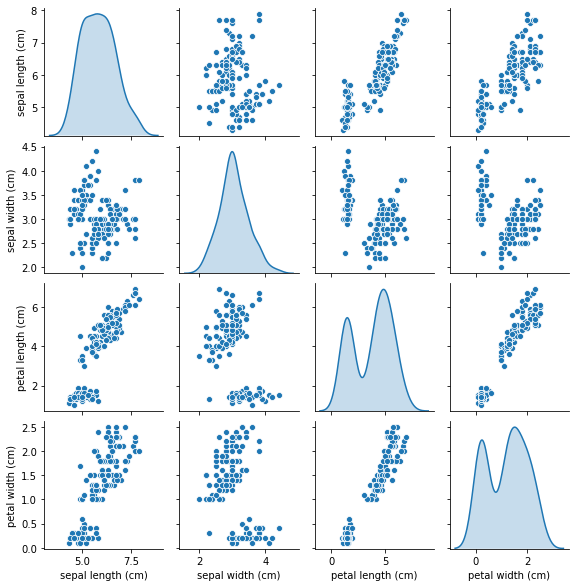

In [21]:
sns.pairplot(df,height=2, diag_kind='kde')

### From above graph we can clearly see there is grouping in our data

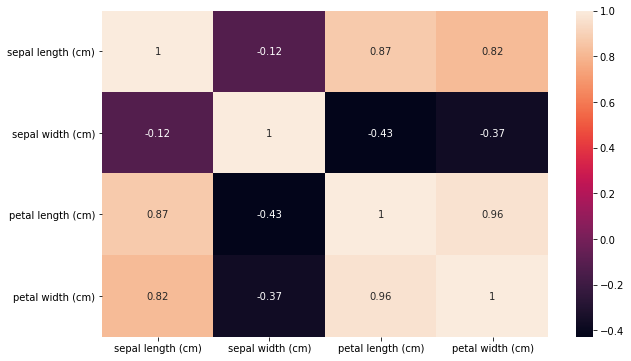

In [24]:
## Here we see the heatmap of correlation

plt.figure(figsize=(10,6))

sns.heatmap(df.corr(), annot=True)

## Training the Algorithm
K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

There are 3 steps:

Initialisation – K initial “means” (centroids) are generated at random

Assignment – K clusters are created by associating each observation with the nearest centroid

Update – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence

The end result is that the sum of squared errors is minimised between points and their respective centroids.

In [34]:
X = df.iloc[:, [0, 1, 2, 3]].values

## Find the optimum number of clusters for K Means Classification using Elbow method

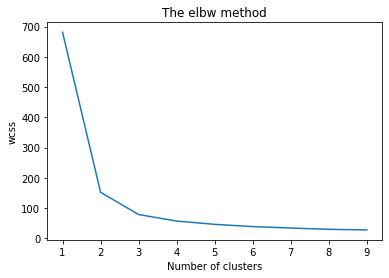

<Figure size 432x288 with 0 Axes>

In [27]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,10),wcss)  # plotting the result
plt.title('The elbw method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') ## within cluster sum of square
plt.show()
plt.tight_layout()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs.

This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ' 3 ' .


In [29]:
 ## Applying kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Making Predictions

y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

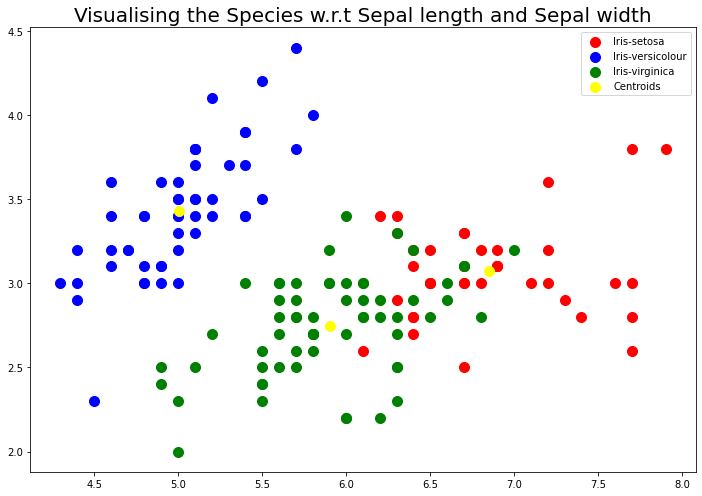

In [35]:

# Visualising the clusters - On the first two columns

plt.figure(figsize=(10,7))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Visualising the Species w.r.t Sepal length and Sepal width', fontsize=20)
plt.legend()
plt.tight_layout()

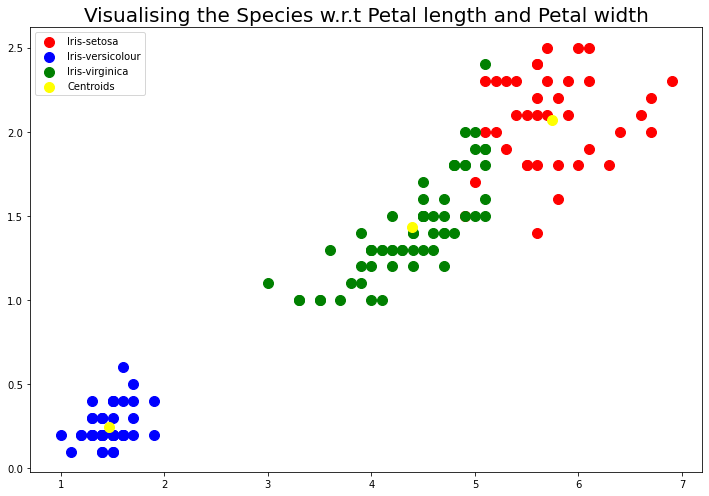

In [36]:

plt.figure(figsize=(10,7))

plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Visualising the Species w.r.t Petal length and Petal width', fontsize=20)
plt.legend()
plt.tight_layout()